# **1. initialize Our Environment**

### **1.1 Importing Libs We Will Use**

In [1]:
import cv2                                            # For Read Images as array from Path
import numpy as np                                    # For dealing with arrays
import os                                             # For dealing with paths
import matplotlib.pyplot as plt                       # For Showing Images 
from skimage import feature                           # For Extaracting Featuers From Image array 
from tensorflow.keras import layers,models,losses     # For Model Building
from tqdm import tqdm                                 # For Showing the progress of Loading
from sklearn.model_selection import train_test_split  # For Splitting Data into Train and Test For Model
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### **1.2 initialize Vars**

In [2]:
dataPath = "./chess/train"                                    # Save The Path of The Data In Var

validPath = "./chess/valid"

pieces = ["bishop","king","knight","pawn","queen","rook"]     # Save our Pieces We can Predict in array

trainingData = []                                             # Make an Array Saves Our Training data as Array And it's Class

trainingDataFeatuers = []                                     # Make an Array Saves Our Training data Featuers as Array 

trainingDataLabel = []                                        # Make an Array Saves Our Training data Labels as Array 

width = 128
height = 256

### **1.3 initialize Functions**

In [3]:
def createTrainingData():                                      # function for get The Data Which The model will Be trained with 
    for piece in pieces:
    
        path = os.path.join(dataPath,piece)                                     # create path 
        class_num = pieces.index(piece)                                         # get the classification
    
        for img in tqdm(os.listdir(path)):                                      # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img))                  # convert to array
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
                img_array=cv2.resize(img_array, (width, height))
                img_array = feature.hog(img_array)   # function which extract featuers 
                trainingData.append([img_array, class_num])                     # add this to our trainingData
            except Exception as e:                                              # in the interest in keeping the output clean...
                pass
            
    for features,label in trainingData:                                         # Splites it into Featuers And Labels ...
        trainingDataFeatuers.append(features)
        trainingDataLabel.append(label)
        
def Validate (*args):
    if (len(args) == 0 ):
        model = models.load_model("Last.h5")
        validateDataDir = validPath
        TP = os.path.join(validateDataDir)
        for file in os.listdir(TP):
            P = os.path.join(TP,file)
            for img in os.listdir(P):
                try:
                    imgName= img
                    img = cv2.imread(os.path.join(P,img))  
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (width, height))
            #         plt.imshow(img,cmap=plt.cm.binary)
            #         plt.show()
                    img = feature.hog(img)
                    prediction = annModel.predict(np.array([img])/255)

                    index=np.argmax(prediction)
                    print("welcome ",file," ",pieces[index])
                except Exception as e:
                    print("Some Thing Went Wrong")
    elif (len(args)==1):
        model = models.load_model(args[0])
        validateDataDir = validPath
        TP = os.path.join(validateDataDir)
        for file in os.listdir(TP):
            P = os.path.join(TP,file)
            for img in os.listdir(P):
                try:
                    imgName= img
                    img = cv2.imread(os.path.join(P,img))  
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    img = cv2.resize(img, (width, height))
            #         plt.imshow(img,cmap=plt.cm.binary)
            #         plt.show()
                    img = feature.hog(img)
                    prediction = annModel.predict(np.array([img])/255)

                    index=np.argmax(prediction)
                    print("welcome ",file," ",pieces[index])
                except Exception as e:
                    print("Some Thing Went Wrong")
                

# **2. Data Section**

### **2.1 Get The Data**

In [4]:
createTrainingData()

100%|████████████████████████████████████████████████████████████████████████████████| 315/315 [00:09<00:00, 33.12it/s]


### **2.2 Splites it into Training Data and Test Data**

In [5]:
featuersTrainData, featuersTestData, labelsTrainData, labelsTestData = train_test_split(trainingDataFeatuers , trainingDataLabel, test_size=0.15, random_state=42)

### **2.3 Preprocess The Data**

In [6]:
featuersTrainData = np.array(featuersTrainData)                  # Make featuersTrainData Array as a Numby array for easy use

labelsTrainData=np.array(labelsTrainData)                        # Make labelsTrainData Array as a Numby array for easy use

featuersTestData = np.array(featuersTestData)                    # Make featuersTestData Array as a Numby array for easy use

labelsTestData=np.array(labelsTestData)                          # Make labelsTestData Array as a Numby array for easy use


featuersTrainData=featuersTrainData/255.0                        # Normalize featuersTrainData Array
featuersTestData=featuersTestData/255.0                          # Normalize featuersTestData Array

# **3. Model Section**

### **3.1 Build Model**

In [7]:
annModel = models.Sequential()

annModel.add(layers.Dense(40, input_shape=(featuersTrainData.shape[1],), activation='relu')) # First Layer in Model is our input layer

annModel.add(layers.Dropout(0.33)) # This Layer in Model is Hidden layer which drops % from feature every epoch avoids locals

annModel.add(layers.Dense(30))  # Hidden Layer in Model has 30 node

annModel.add(layers.Dense(15))  # Hidden Layer in Model has 15 node

annModel.add(layers.Flatten())  # Hidden Layer converts our 3D feature maps to 1D feature vectors

annModel.add(layers.Dense(40))  # Hidden Layer in Model has 40 node

annModel.add(layers.Dense(25))  # Hidden Layer in Model has 25 node

annModel.add(layers.Dense(15))  # Hidden Layer in Model has 15 node

annModel.add(layers.Dense(6,activation='softmax'))  # Last Layer in Model is our Output Layer 

### **3.2 Compile And  Fit Model** 

In [9]:
annModel.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = annModel.fit(featuersTrainData, labelsTrainData ,epochs=50, validation_data=(featuersTestData, labelsTestData), batch_size=32)
annModel.evaluate(featuersTestData,labelsTestData,verbose=2)
#annModel.save("Last.h5")

Epoch 1/50
51/51 [==============================] - 2s 23ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.6016 - val_accuracy: 0.9231
Epoch 2/50
51/51 [==============================] - 1s 18ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 1.0032 - val_accuracy: 0.8916
Epoch 3/50
51/51 [==============================] - 1s 18ms/step - loss: 0.0599 - accuracy: 0.9778 - val_loss: 0.7701 - val_accuracy: 0.9091
Epoch 4/50
51/51 [==============================] - 1s 13ms/step - loss: 0.0311 - accuracy: 0.9895 - val_loss: 0.6075 - val_accuracy: 0.9301
Epoch 5/50
51/51 [==============================] - 1s 13ms/step - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.5509 - val_accuracy: 0.9231
Epoch 6/50
51/51 [==============================] - 1s 12ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.5369 - val_accuracy: 0.9266
Epoch 7/50
51/51 [==============================] - 1s 12ms/step - loss: 0.0250 - accuracy: 0.9895 - val_loss: 0.8112 - val_accuracy: 0.9196
Epoch 8/50
51

[0.6467954516410828, 0.9125874042510986]

### **3.3 Save Model**

In [44]:
#annModel.save("Last.h5")

## **4. Validate Data**

In [71]:
Validate()
print("*******************************")
Validate("Saved1.h5")

welcome  bishop   bishop
welcome  bishop   bishop
welcome  bishop   bishop
welcome  bishop   bishop
welcome  bishop   bishop
welcome  king   king
welcome  king   king
welcome  king   king
welcome  king   king
welcome  king   king
welcome  king   king
welcome  knight   knight
welcome  knight   knight
welcome  knight   knight
welcome  knight   knight
welcome  knight   knight
welcome  pawn   pawn
welcome  pawn   pawn
welcome  pawn   pawn
welcome  pawn   pawn
welcome  pawn   pawn
welcome  pawn   rook
welcome  queen   queen
welcome  queen   queen
welcome  queen   queen
welcome  queen   queen
welcome  queen   queen
welcome  rook   rook
welcome  rook   rook
welcome  rook   rook
welcome  rook   rook
welcome  rook   rook
welcome  rook   knight
welcome  rook   rook
welcome  rook   rook
*******************************
welcome  bishop   bishop
welcome  bishop   bishop
welcome  bishop   bishop
welcome  bishop   bishop
welcome  bishop   bishop
welcome  king   king
welcome  king   king
welcome  king 

## **5. Plots**

### **5.1 ROC Curve**

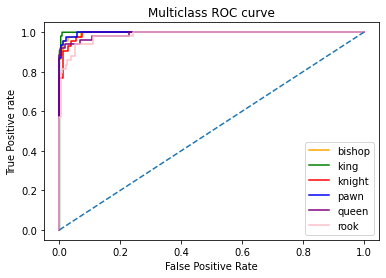

In [72]:
pred = annModel.predict(featuersTestData)
fpr = {}
tpr = {}
thresh ={}
n_class = len(pieces)
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(labelsTestData, pred[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='-',color='orange', label='bishop')
plt.plot(fpr[1], tpr[1], linestyle='-',color='green', label='king')
plt.plot(fpr[2], tpr[2], linestyle='-',color='red', label='knight')
plt.plot(fpr[3], tpr[3], linestyle='-',color='blue', label='pawn')
plt.plot(fpr[4], tpr[4], linestyle='-',color='purple', label='queen')
plt.plot(fpr[5], tpr[5], linestyle='-',color='pink', label='rook')
plt.plot([0,1],[0,1],linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

### **5.2 Loss Curve**

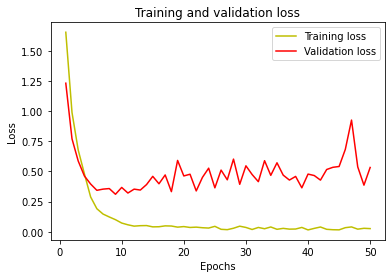

In [73]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **5.3 Confusion Matrix**

<AxesSubplot:>

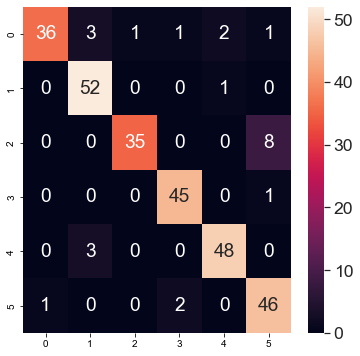

In [13]:
y_pred = annModel.predict(featuersTestData)
labels_pred = []
for i in y_pred:
    index=np.argmax(i)
    labels_pred.append(index)
    
cm = confusion_matrix(labelsTestData,labels_pred)
fig, ax = plt.subplots(figsize=(6,6))         # Sample figsize in inches
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)